In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_base = pd.read_csv('UID_ISO_FIPS_LookUp_Table.csv')
df_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('time_series_covid19_recovered_global.csv')

In [3]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4021 entries, 0 to 4020
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UID             4021 non-null   int64  
 1   iso2            4018 non-null   object 
 2   iso3            4019 non-null   object 
 3   code3           4019 non-null   float64
 4   FIPS            3302 non-null   float64
 5   Admin2          3261 non-null   object 
 6   Province_State  3833 non-null   object 
 7   Country_Region  4021 non-null   object 
 8   Lat             3886 non-null   float64
 9   Long_           3886 non-null   float64
 10  Combined_Key    4021 non-null   object 
 11  Population      3884 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 377.1+ KB


In [4]:
df_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 150 entries, Province/State to 6/15/20
dtypes: float64(2), int64(146), object(2)
memory usage: 311.8+ KB


In [5]:
df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 150 entries, Province/State to 6/15/20
dtypes: float64(2), int64(146), object(2)
memory usage: 311.8+ KB


In [6]:
df_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 150 entries, Province/State to 6/15/20
dtypes: float64(2), int64(146), object(2)
memory usage: 296.6+ KB


In [7]:
df_base

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
3,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
4,24,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.202700,17.873900,Angola,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4016,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4017,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4018,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
4019,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


In [8]:
df_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,852,852,852,852,852,852,853,853,853,853
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,88,91,92,96,113,118,130,138,140,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,499,513,513,514,611,632,639,659,661,662
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,482,484,496,524,560,591,632,705,728,844
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,141,141,141,141,162,162,163,176,176,176
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,4453,4529,4609,4690,4763,4834,4902,4971,5035,5097


In [9]:
df_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,327,357,369,384,405,426,446,451,471,478
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,34,34,34,34,34,35,36,36,36,36
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,698,707,715,724,732,741,751,760,767,777
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,4,4,4,4,4,5,5,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,111,112,112,127,129,136,139,160,164,208
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,48,48,48,48,48,49,49,50,50,50


In [10]:
df_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,925,938,945,960,980,1001,1034,1039,1044,1055
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6631,6717,6799,6951,7074,7255,7322,7420,7606,7735
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,741,744,751,757,759,780,781,781,781,789
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,24,24,38,38,40,41,42,61,61,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,68,68,68,76,135,146,156,176,177,177
249,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,23,23,23,23,23,23,28,39,53,79
250,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,67,67,67,67,97,97,97,114,114,114
251,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,2583,2673,2763,2815,2947,3062,3158,3288,3409,3503


In [11]:
df_confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/6/20', '6/7/20', '6/8/20', '6/9/20', '6/10/20', '6/11/20', '6/12/20',
       '6/13/20', '6/14/20', '6/15/20'],
      dtype='object', length=150)

In [12]:
df_confirmed = df_confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
df_confirmed

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
38831,NaN,Sao Tome and Principe,0.186360,6.613081,6/15/20,662
38832,NaN,Yemen,15.552727,48.516388,6/15/20,844
38833,NaN,Comoros,-11.645500,43.333300,6/15/20,176
38834,NaN,Tajikistan,38.861034,71.276093,6/15/20,5097


In [13]:
df_confirmed = df_confirmed.rename({'variable': 'Date', 'value' : 'confirmed_cases'}, axis = 'columns')
df_confirmed

,Province/State,Country/Region,Lat,Long,Date,confirmed_cases
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
38831,NaN,Sao Tome and Principe,0.186360,6.613081,6/15/20,662
38832,NaN,Yemen,15.552727,48.516388,6/15/20,844
38833,NaN,Comoros,-11.645500,43.333300,6/15/20,176
38834,NaN,Tajikistan,38.861034,71.276093,6/15/20,5097


In [14]:
df_deaths = df_deaths.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
df_recovered = df_recovered.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
df_deaths

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
38831,NaN,Sao Tome and Principe,0.186360,6.613081,6/15/20,12
38832,NaN,Yemen,15.552727,48.516388,6/15/20,208
38833,NaN,Comoros,-11.645500,43.333300,6/15/20,2
38834,NaN,Tajikistan,38.861034,71.276093,6/15/20,50


In [15]:
df_deaths = df_deaths.rename({'variable': 'Date', 'value' : 'deaths'}, axis = 'columns')
df_recovered = df_recovered.rename({'variable': 'Date', 'value' : 'recoveries'}, axis = 'columns')

In [16]:
df_cases = df_confirmed.merge(df_deaths, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])
df_cases = df_cases.merge(df_recovered, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])

In [17]:
df_cases

,Province/State,Country/Region,Lat,Long,Date,confirmed_cases,deaths,recoveries
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
36349,NaN,Sao Tome and Principe,0.186360,6.613081,6/15/20,662,12,177
36350,NaN,Yemen,15.552727,48.516388,6/15/20,844,208,79
36351,NaN,Comoros,-11.645500,43.333300,6/15/20,176,2,114
36352,NaN,Tajikistan,38.861034,71.276093,6/15/20,5097,50,3503


In [18]:
df_cases.groupby('Country/Region')['confirmed_cases'].mean().sort_values(ascending=False)

Country/Region
US                  654191.150685
Brazil              135468.924658
Spain               114452.342466
Italy               113602.719178
Russia              113243.000000
                        ...      
Holy See                 5.835616
MS Zaandam               4.739726
Papua New Guinea         3.554795
Western Sahara           3.335616
Lesotho                  0.582192
Name: confirmed_cases, Length: 184, dtype: float64

In [19]:
df_cases.groupby('Country/Region')['deaths'].mean().sort_values(ascending=False)

Country/Region
US                                  37133.602740
Italy                               15368.602740
Spain                               12634.431507
Brazil                               7805.965753
Belgium                              3792.520548
                                        ...     
Saint Kitts and Nevis                   0.000000
Saint Lucia                             0.000000
Saint Vincent and the Grenadines        0.000000
Seychelles                              0.000000
Dominica                                0.000000
Name: deaths, Length: 184, dtype: float64

In [20]:
df_base

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
3,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
4,24,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.202700,17.873900,Angola,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4016,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4017,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4018,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
4019,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


In [21]:
df_base.duplicated().sum()

0

In [22]:
df_cases.duplicated().sum()

0

In [23]:
df_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36354 entries, 0 to 36353
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Province/State   9782 non-null   object 
 1   Country/Region   36354 non-null  object 
 2   Lat              36354 non-null  float64
 3   Long             36354 non-null  float64
 4   Date             36354 non-null  object 
 5   confirmed_cases  36354 non-null  int64  
 6   deaths           36354 non-null  int64  
 7   recoveries       36354 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 2.2+ MB


In [24]:
df_cases['Date']

0        1/22/20
1        1/22/20
2        1/22/20
3        1/22/20
4        1/22/20
          ...   
36349    6/15/20
36350    6/15/20
36351    6/15/20
36352    6/15/20
36353    6/15/20
Name: Date, Length: 36354, dtype: object

In [25]:
df_cases['Date'] = pd.to_datetime(df_cases['Date'], format='%m/%d/%y')

In [26]:
df_cases.isnull().sum()

Province/State     26572
Country/Region         0
Lat                    0
Long                   0
Date                   0
confirmed_cases        0
deaths                 0
recoveries             0
dtype: int64

In [27]:
df_cases

,Province/State,Country/Region,Lat,Long,Date,confirmed_cases,deaths,recoveries
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
36349,NaN,Sao Tome and Principe,0.186360,6.613081,2020-06-15,662,12,177
36350,NaN,Yemen,15.552727,48.516388,2020-06-15,844,208,79
36351,NaN,Comoros,-11.645500,43.333300,2020-06-15,176,2,114
36352,NaN,Tajikistan,38.861034,71.276093,2020-06-15,5097,50,3503


In [28]:
df_cases.drop(['Province/State'], axis=1, inplace=True)

In [29]:
df_cases.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'confirmed_cases', 'deaths',
       'recoveries'],
      dtype='object')

In [30]:
df_cases.groupby(['Country/Region','Date'])['confirmed_cases'].tail()

0           0
1           0
2           0
3           0
4           0
         ... 
36349     662
36350     844
36351     176
36352    5097
36353       4
Name: confirmed_cases, Length: 30076, dtype: int64

In [31]:
df_cases.groupby(['Country/Region','Date']).mean(numeric_only=True).sort_values('confirmed_cases', ascending=False)

Lat     Long  confirmed_cases    deaths  \
Country/Region Date                                                      
US             2020-06-15  37.0902 -95.7129        2114026.0  116127.0   
               2020-06-14  37.0902 -95.7129        2094058.0  115732.0   
               2020-06-13  37.0902 -95.7129        2074526.0  115436.0   
               2020-06-12  37.0902 -95.7129        2048986.0  114669.0   
               2020-06-11  37.0902 -95.7129        2023590.0  113823.0   
...                            ...      ...              ...       ...   
Lebanon        2020-02-07  33.8547  35.8623              0.0       0.0   
               2020-02-08  33.8547  35.8623              0.0       0.0   
               2020-02-09  33.8547  35.8623              0.0       0.0   
               2020-02-10  33.8547  35.8623              0.0       0.0   
Kuwait         2020-01-22  29.5000  47.7500              0.0       0.0   

                           recoveries  
Country/Region Date                    
US             2020-06-15    576334.0  
               2020-06-14    561816.0  
               2020-06-13    556606.0  
               2020-06-12    547386.0  
               2020-06-11    540292.0  
...                               ...  
Lebanon        2020-02-07         0.0  
               2020-02-08         0.0  
               2020-02-09         0.0  
               2020-02-10         0.0  
Kuwait         2020-01-22         0.0  

[26864 rows x 5 columns]

In [32]:
#Compare recoveries between countries.
df_cases.groupby(['Country/Region']).max(numeric_only=True).sort_values('recoveries', ascending=False)

,Lat,Long,confirmed_cases,deaths,recoveries
Country/Region,,,,,
US,37.090200,-95.712900,2114026,116127,576334
Brazil,-14.235000,-51.925300,888271,43959,477709
Russia,60.000000,90.000000,536484,7081,284021
India,21.000000,78.000000,343091,9900,180013
Italy,43.000000,12.000000,237290,34371,177010
...,...,...,...,...,...
Western Sahara,24.215500,-12.885800,9,1,8
Papua New Guinea,-6.315000,143.955500,8,0,8
Lesotho,-29.609988,28.233608,4,0,2


In [33]:
# Check correlation between deaths and recoveries.
df_cases.groupby(['Country/Region']).corr(numeric_only=True)

Lat  Long  confirmed_cases    deaths  \
Country/Region                                                         
Afghanistan    Lat              NaN   NaN              NaN       NaN   
               Long             NaN   NaN              NaN       NaN   
               confirmed_cases  NaN   NaN         1.000000  0.990837   
               deaths           NaN   NaN         0.990837  1.000000   
               recoveries       NaN   NaN         0.943945  0.948463   
...                             ...   ...              ...       ...   
Zimbabwe       Lat              NaN   NaN              NaN       NaN   
               Long             NaN   NaN              NaN       NaN   
               confirmed_cases  NaN   NaN         1.000000  0.571325   
               deaths           NaN   NaN         0.571325  1.000000   
               recoveries       NaN   NaN         0.958390  0.636449   

                                recoveries  
Country/Region                              
Afghanistan    Lat                     NaN  
               Long                    NaN  
               confirmed_cases    0.943945  
               deaths             0.948463  
               recoveries         1.000000  
...                                    ...  
Zimbabwe       Lat                     NaN  
               Long                    NaN  
               confirmed_cases    0.958390  
               deaths             0.636449  
               recoveries         1.000000  

[920 rows x 5 columns]

In [34]:
df_cases['deaths'].corr(df_cases['recoveries'])

0.7920192695595534

In [35]:
top_countries = df_cases.groupby('Country/Region')['confirmed_cases'].max().sort_values(ascending=False).head(10).index
top_countries

Index(['US', 'Brazil', 'Russia', 'India', 'United Kingdom', 'Spain', 'Italy',
       'Peru', 'Iran', 'France'],
      dtype='object', name='Country/Region')

In [36]:
df_top_countries = df_cases[df_cases['Country/Region'].isin(top_countries)]

Text(0.5, 1.0, 'Confirmed Covid Cases by Country')

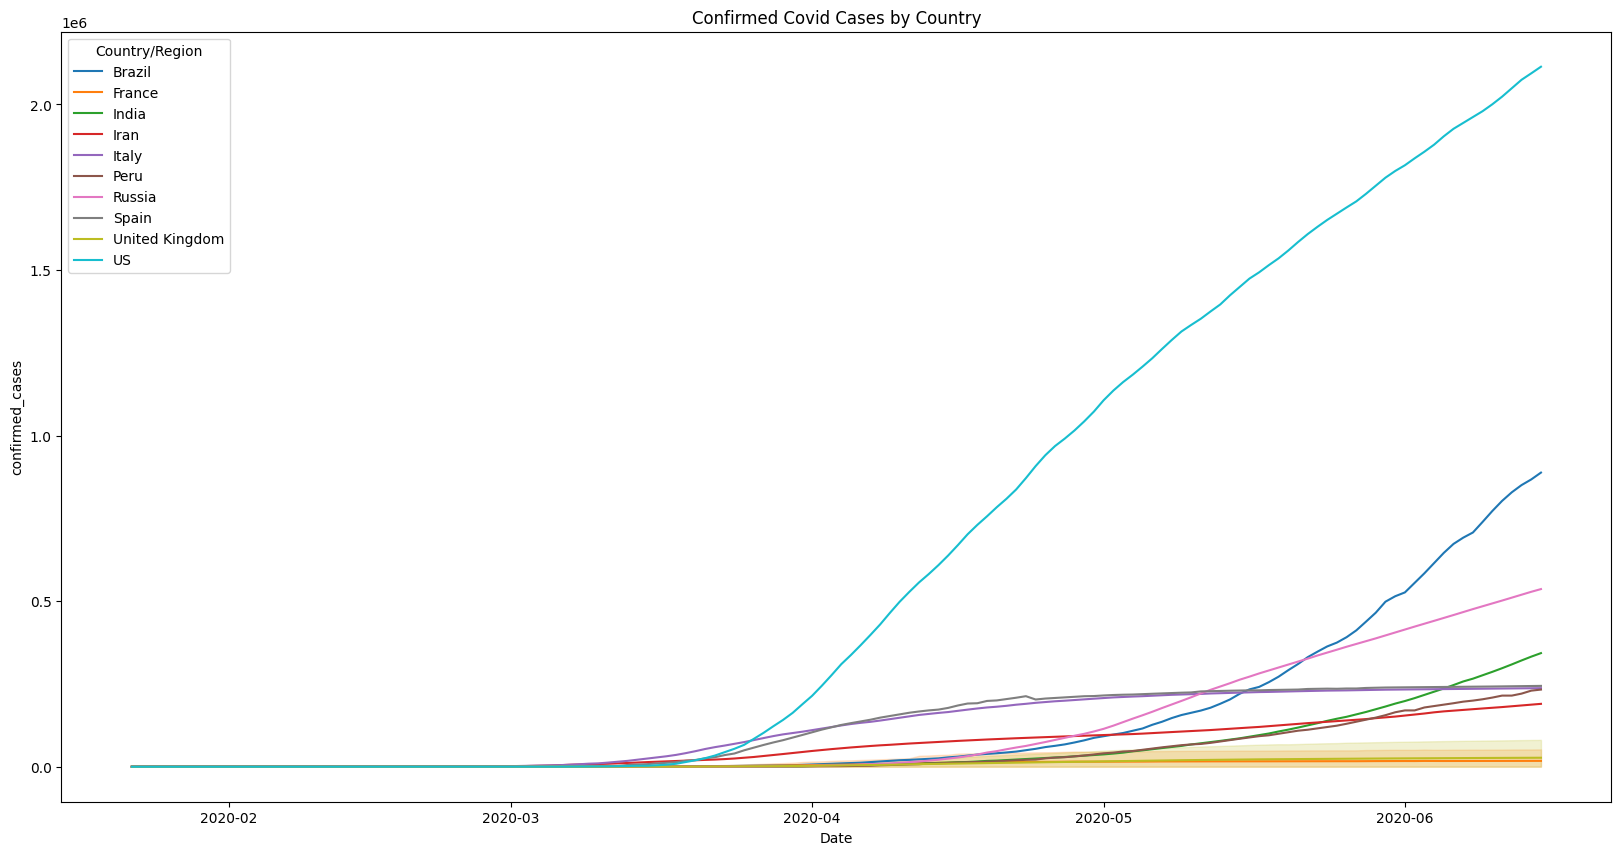

In [37]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_top_countries, x='Date', y='confirmed_cases', hue='Country/Region')
plt.title('Confirmed Covid Cases by Country')

Text(0.5, 1.0, 'Recoveries by Country')

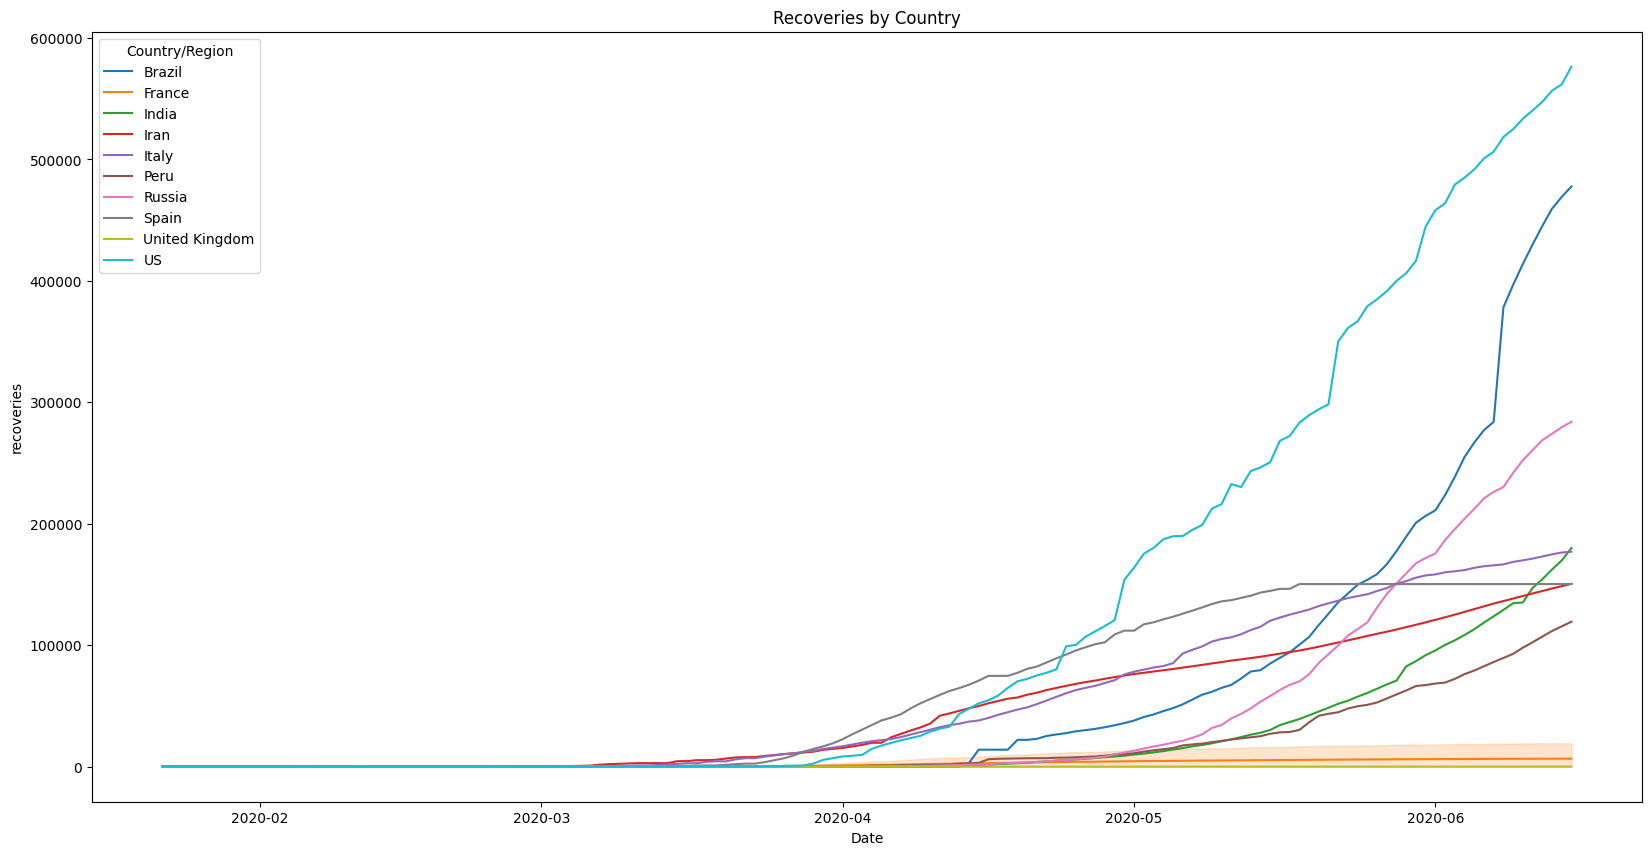

In [38]:
#recoveries 
plt.figure(figsize=(20,10))
sns.lineplot(data=df_top_countries, x='Date', y='recoveries', hue='Country/Region')
plt.title('Recoveries by Country')

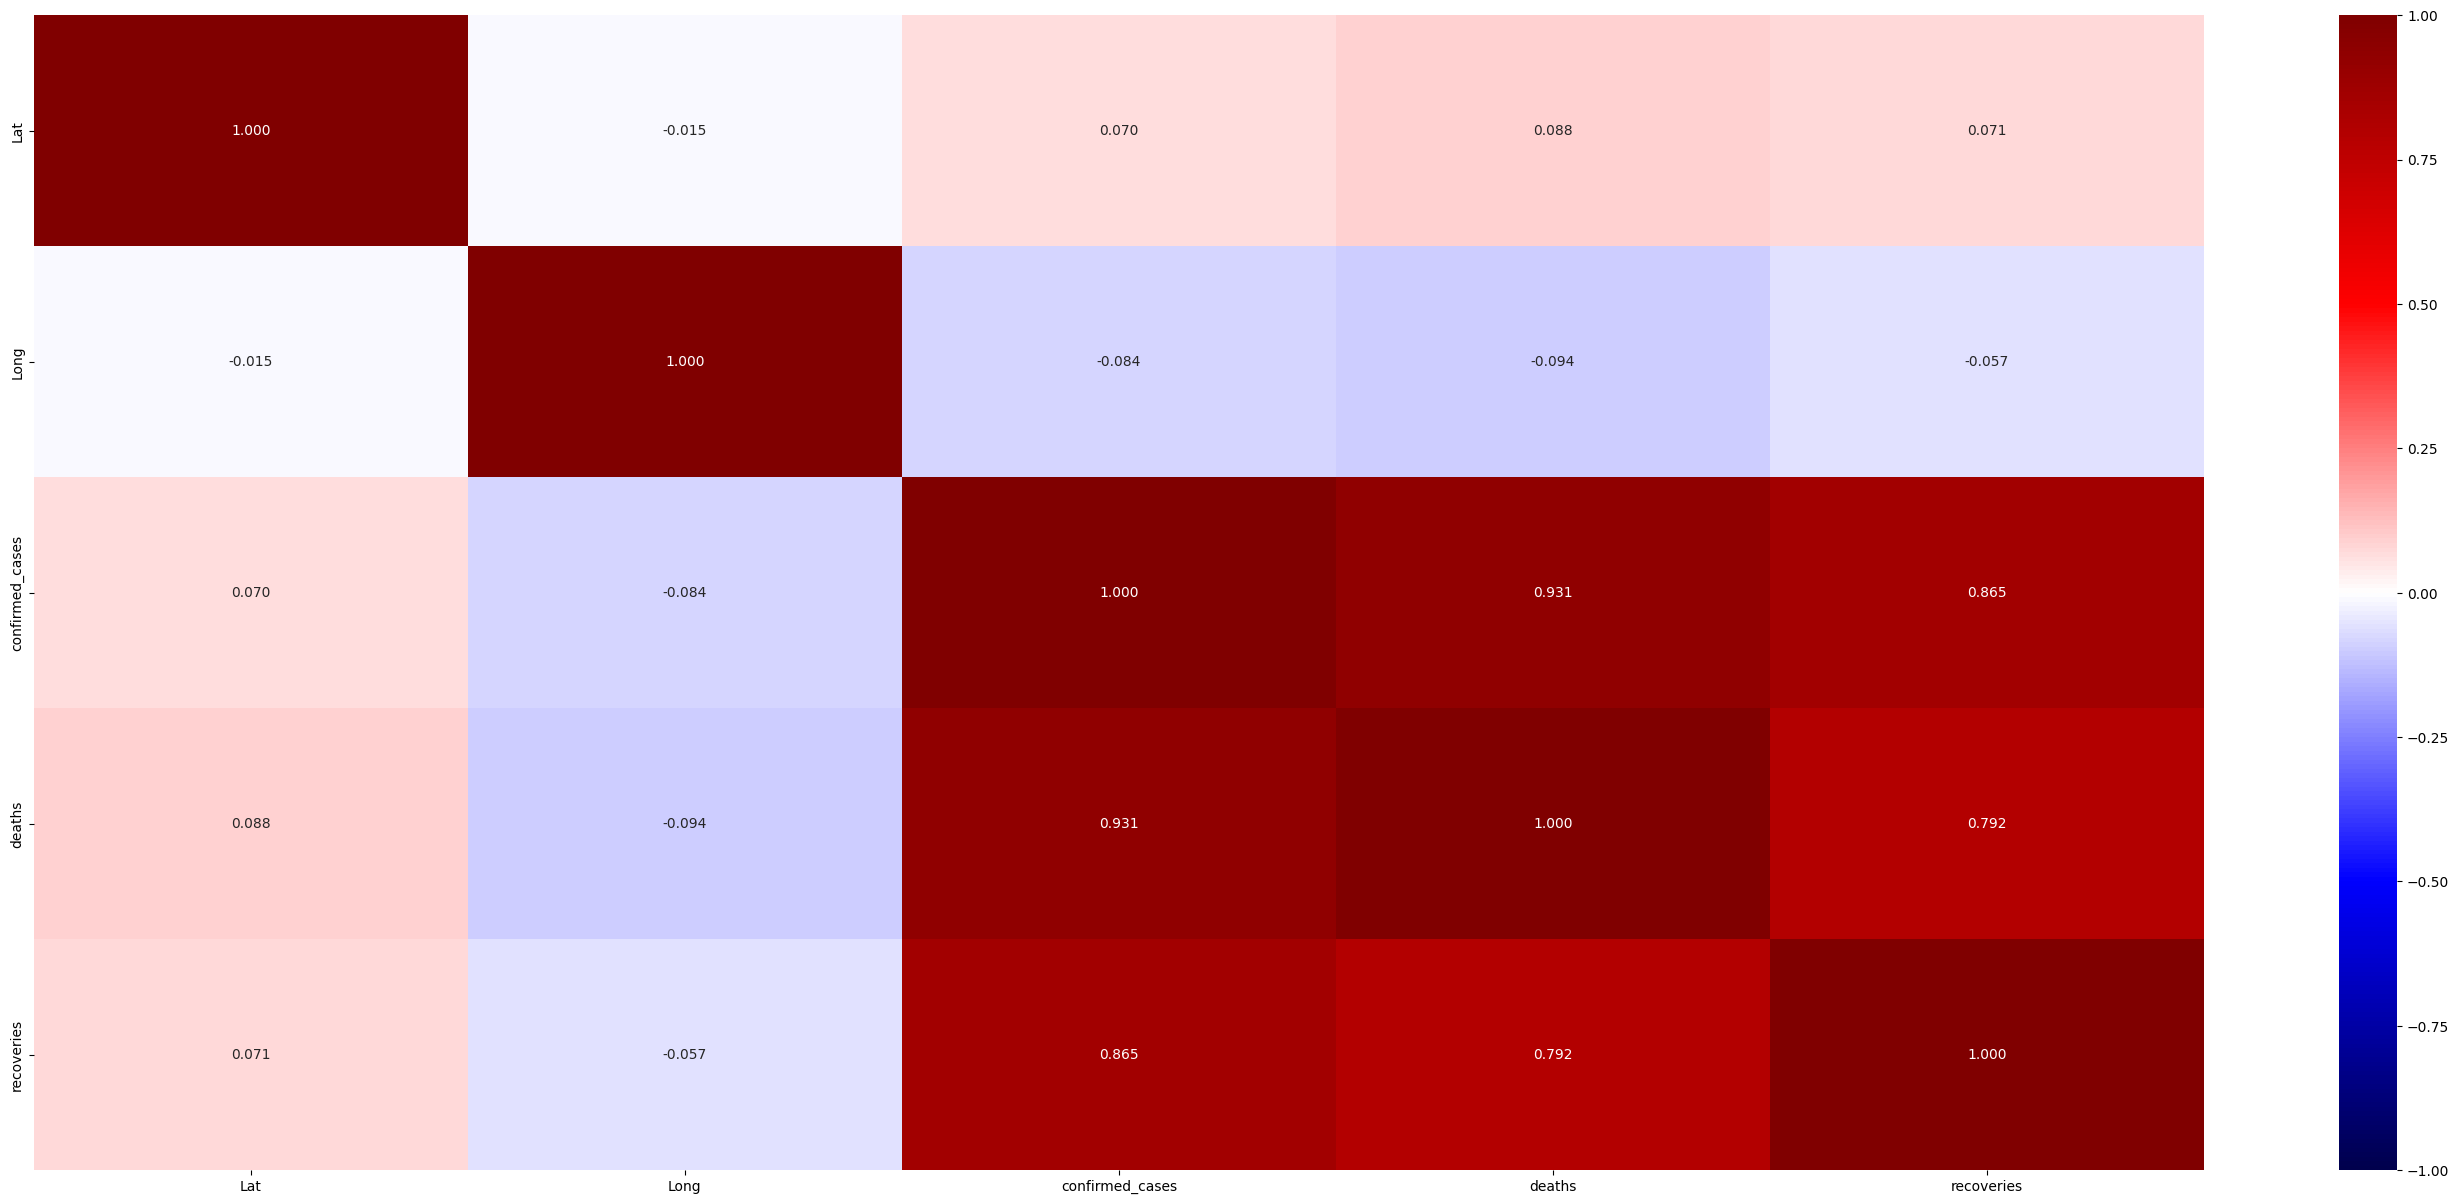

In [39]:
#Check correlation between deaths and recoveries.
plt.figure(figsize=[35,15])
sns.heatmap(df_cases.corr(numeric_only=True), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.3f');


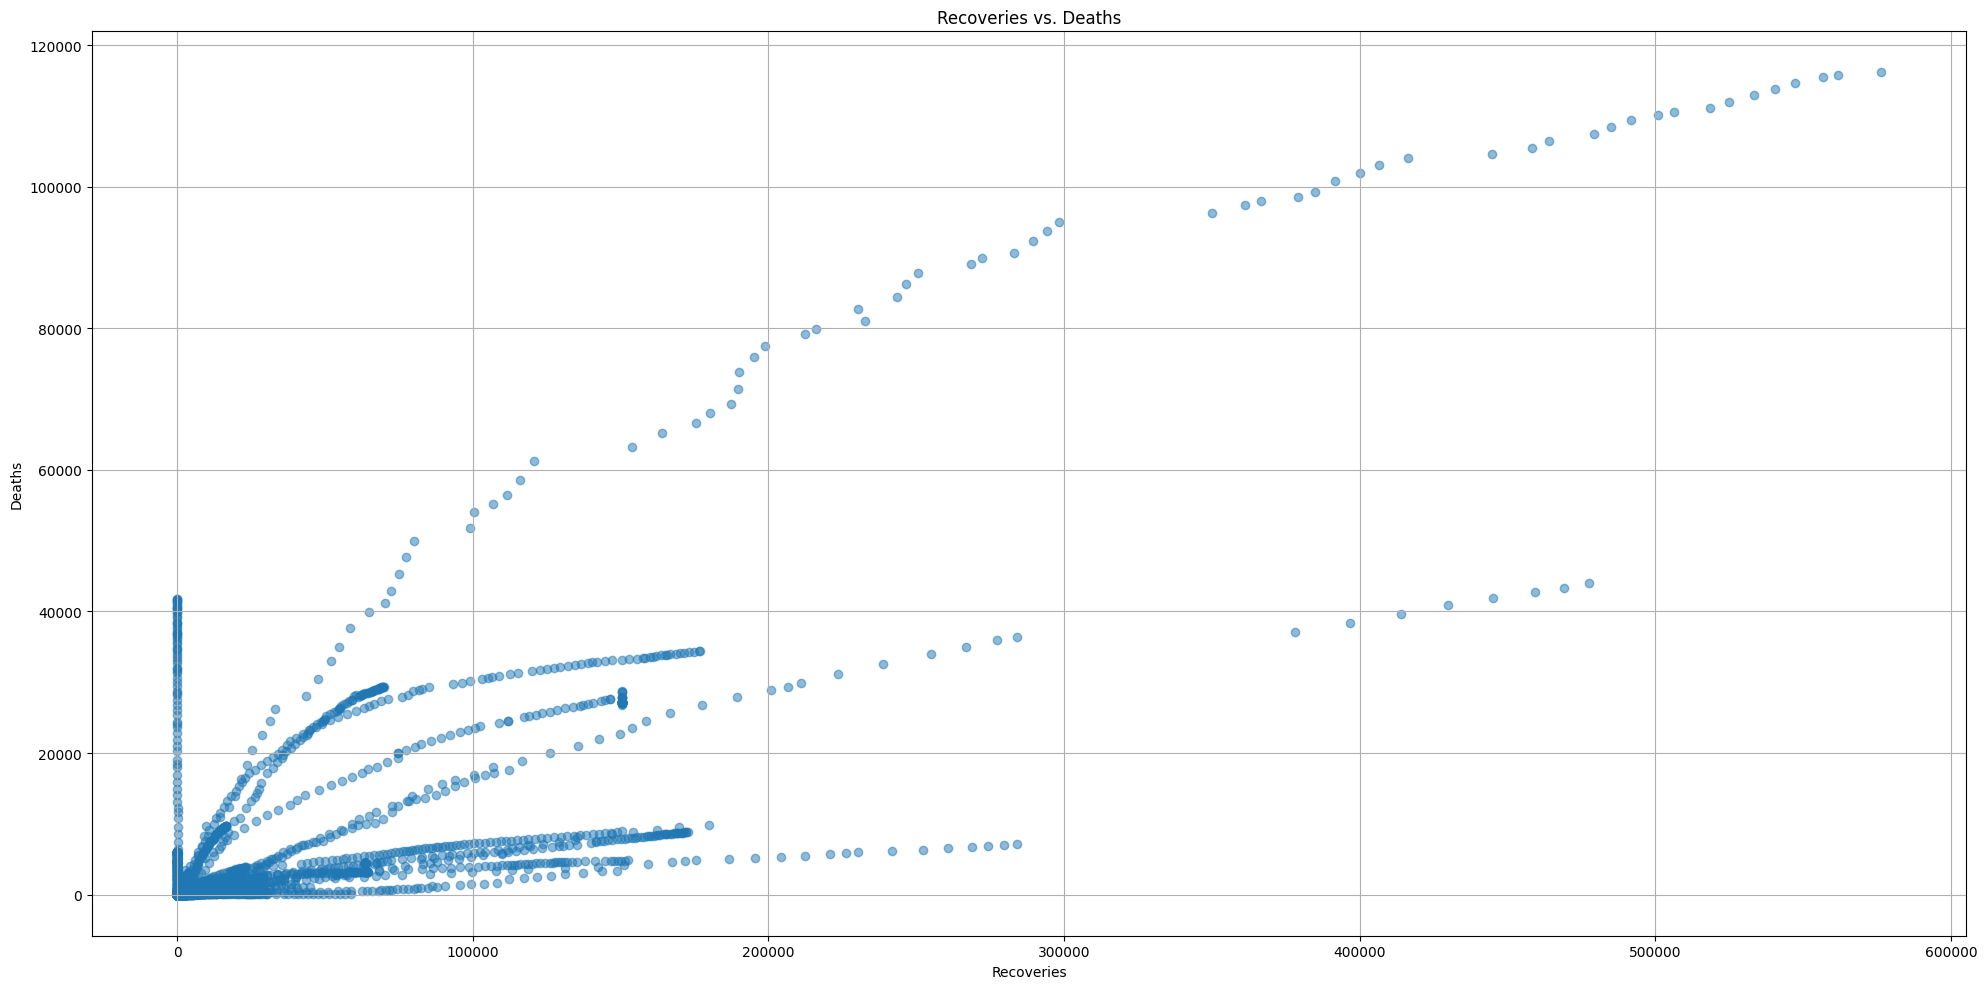

In [40]:
plt.figure(figsize=(20,10))  
plt.scatter(df_cases['recoveries'], df_cases['deaths'], alpha=0.5)  
plt.title('Recoveries vs. Deaths')    
plt.xlabel('Recoveries')  
plt.ylabel('Deaths')     
plt.grid(True)
plt.tight_layout()

In [41]:
df_cases.groupby(['Country/Region']).mean(['recoveries'])

,Lat,Long,confirmed_cases,deaths,recoveries
Country/Region,,,,,
Afghanistan,33.000000,65.000000,3876.082192,78.321918,463.787671
Albania,41.153300,20.168300,454.753425,15.808219,303.410959
Algeria,28.033900,1.659600,3011.910959,254.561644,1622.664384
Andorra,42.506300,1.521800,397.801370,22.184932,243.061644
Angola,-11.202700,17.873900,26.479452,1.500000,7.684932
...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,200.780822,1.184932,113.691781
Western Sahara,24.215500,-12.885800,3.335616,0.143836,2.136986
Yemen,15.552727,48.516388,84.150685,18.287671,3.931507


In [42]:
total_recoveries = df_top_countries.groupby('Country/Region')['recoveries'].sum().sort_values(ascending=False)
total_recoveries

Country/Region
US                18232438
Brazil             8834540
Spain              8777791
Italy              7632317
Iran               6589662
Russia             5891183
France             3927466
India              3280647
Peru               2563505
United Kingdom       68475
Name: recoveries, dtype: int64

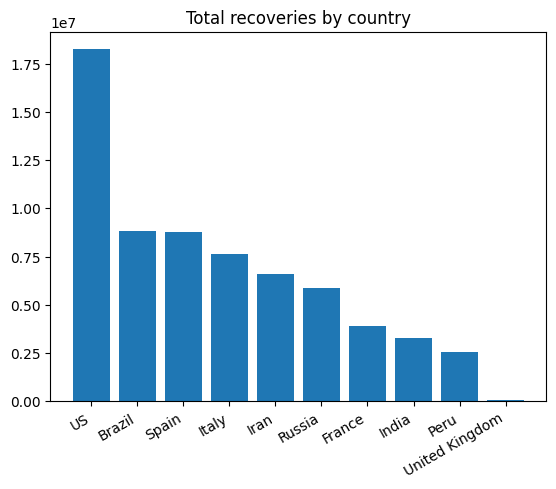

In [43]:
plt.bar(total_recoveries.index, total_recoveries);
plt.xticks(rotation=30, ha='right');
plt.title("Total recoveries by country");


In [44]:
#anomalies
df_cases.groupby(['Country/Region','Date'])['deaths'].size().sort_values(ascending=False)

Country/Region  Date      
China           2020-02-26    33
                2020-04-10    33
                2020-04-23    33
                2020-04-22    33
                2020-04-21    33
                              ..
Gambia          2020-06-14     1
                2020-06-13     1
                2020-06-12     1
                2020-06-11     1
Zimbabwe        2020-06-15     1
Name: deaths, Length: 26864, dtype: int64

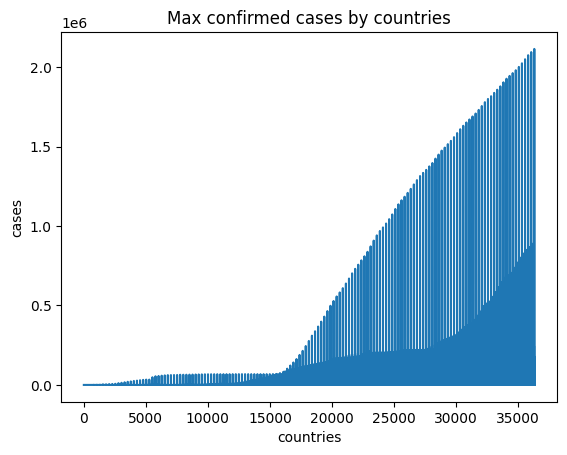

In [45]:
# Anomalies
plt.title('Max confirmed cases by countries')
plt.ylabel('cases')
plt.xlabel('countries')
plt.rcParams["figure.figsize"] = (30,6)
cases = df_cases['confirmed_cases']
cases.plot()
plt.show()

In [46]:
anomalies = df_cases[df_cases["confirmed_cases"] > 0.8* 1e6]
anomalies

,Country/Region,Lat,Long,Date,confirmed_cases,deaths,recoveries
22624,US,37.0902,-95.7129,2020-04-21,809213,45314,75204
22873,US,37.0902,-95.7129,2020-04-22,837414,47649,77366
23122,US,37.0902,-95.7129,2020-04-23,871617,49969,80203
23371,US,37.0902,-95.7129,2020-04-24,907908,51746,99079
23620,US,37.0902,-95.7129,2020-04-25,940829,54015,100372
...,...,...,...,...,...,...,...
35821,US,37.0902,-95.7129,2020-06-13,2074526,115436,556606
35884,Brazil,-14.2350,-51.9253,2020-06-14,867624,43332,469141
36070,US,37.0902,-95.7129,2020-06-14,2094058,115732,561816
36133,Brazil,-14.2350,-51.9253,2020-06-15,888271,43959,477709


In [47]:
anomalies['Country/Region'].unique()

array(['US', 'Brazil'], dtype=object)

In [48]:
anomalies['Date'].unique()

<DatetimeArray>
['2020-04-21 00:00:00', '2020-04-22 00:00:00', '2020-04-23 00:00:00',
 '2020-04-24 00:00:00', '2020-04-25 00:00:00', '2020-04-26 00:00:00',
 '2020-04-27 00:00:00', '2020-04-28 00:00:00', '2020-04-29 00:00:00',
 '2020-04-30 00:00:00', '2020-05-01 00:00:00', '2020-05-02 00:00:00',
 '2020-05-03 00:00:00', '2020-05-04 00:00:00', '2020-05-05 00:00:00',
 '2020-05-06 00:00:00', '2020-05-07 00:00:00', '2020-05-08 00:00:00',
 '2020-05-09 00:00:00', '2020-05-10 00:00:00', '2020-05-11 00:00:00',
 '2020-05-12 00:00:00', '2020-05-13 00:00:00', '2020-05-14 00:00:00',
 '2020-05-15 00:00:00', '2020-05-16 00:00:00', '2020-05-17 00:00:00',
 '2020-05-18 00:00:00', '2020-05-19 00:00:00', '2020-05-20 00:00:00',
 '2020-05-21 00:00:00', '2020-05-22 00:00:00', '2020-05-23 00:00:00',
 '2020-05-24 00:00:00', '2020-05-25 00:00:00', '2020-05-26 00:00:00',
 '2020-05-27 00:00:00', '2020-05-28 00:00:00', '2020-05-29 00:00:00',
 '2020-05-30 00:00:00', '2020-05-31 00:00:00', '2020-06-01 00:00:00',
 '20

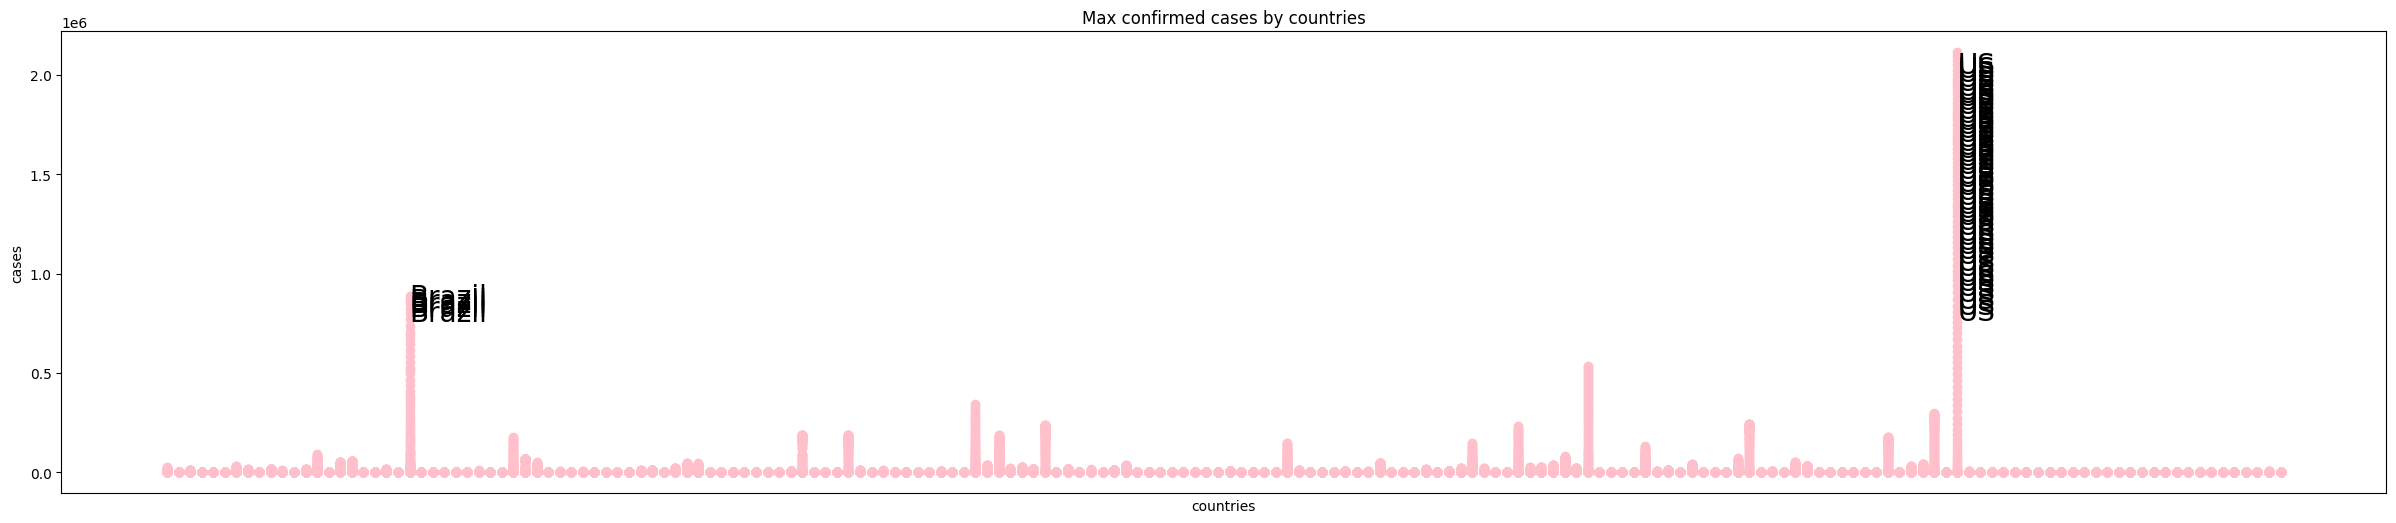

In [49]:
# Label outliers
plt.title('Max confirmed cases by countries')
plt.ylabel('cases')
plt.xlabel('countries')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)

for i in range(len(df_cases["confirmed_cases"])):
    x = df_cases['Country/Region'][i]
    y = df_cases["confirmed_cases"][i]
    plt.plot(x, y, "o", color="pink")
    if df_cases["confirmed_cases"][i] > 0.8* 1e6:
        plt.text(x, y * (1 - 0.05), df_cases['Country/Region'][i], fontsize=20,)
    
plt.show()
